In [25]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

#### Code 3.1

$$Pr(vampire|positive) = \frac{Pr(positive|vampire) Pr(vampire)} {Pr(positive)}$$

$$Pr(positive) = Pr(positive|vampire) Pr(vampire) + Pr(positive|mortal) 1 − Pr(vampire)$$

In [26]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
PrVP

0.08683729433272395

#### Code 3.2 - 3.5

We are goint to use the same function we use on chapter 2 (code 2.3)

In [27]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [28]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

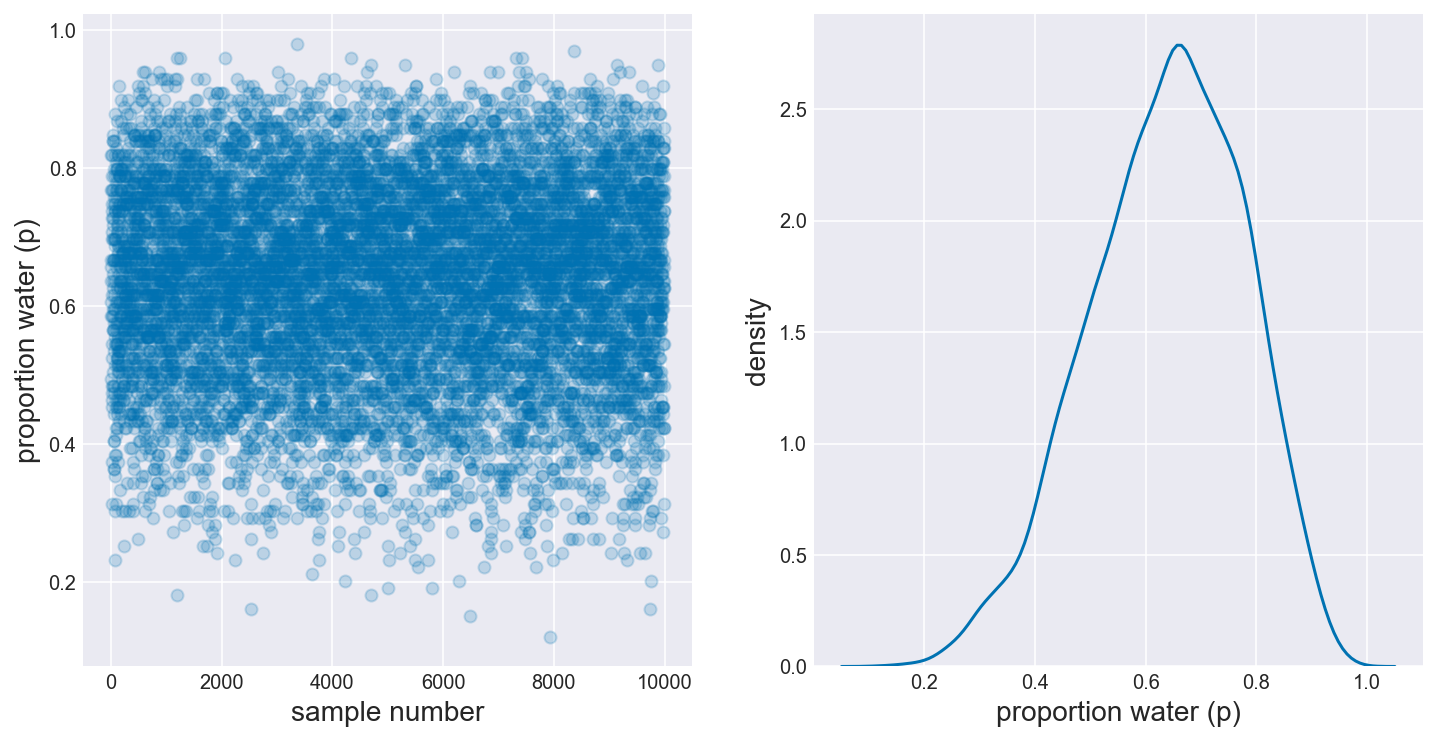

In [29]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

#### Code 3.6

In [30]:
sum(posterior[ p_grid < 0.5 ])

0.17183313110747478

#### Code 3.7

In [31]:
sum( samples < 0.5 ) / 1e4

0.1718

#### Code 3.8

In [32]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.6046

#### Code 3.9

In [33]:
np.percentile(samples, 80)

0.7575757575757577

#### Code 3.10

In [34]:
np.percentile(samples, [10, 90])

array([0.44444444, 0.80808081])

#### Code 3.11

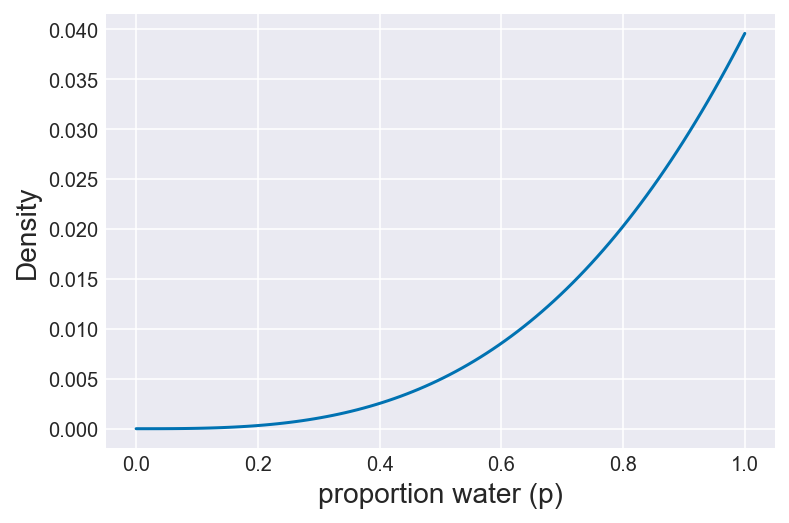

In [35]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 3.12

In [36]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])

array([0.71717172, 0.93939394])

#### Code 3.13

In [37]:
pm.hpd(samples, alpha=0.5)

array([0.84848485, 1.        ])

#### Code 3.14

In [38]:
p_grid[posterior == max(posterior)]

array([1.])

#### Code 3.15

In [39]:
stats.mode(samples)[0]

array([1.])

#### Code 3.16

In [40]:
np.mean(samples), np.median(samples)

(0.8067373737373739, 0.8484848484848485)

#### Code 3.17

In [41]:
sum(posterior * abs(0.5 - p_grid))

0.31626874808692995

#### Code 3.18 and 3.19

In [42]:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
p_grid[loss == min(loss)]

array([0.84848485])

#### Code 3.20

In [43]:
stats.binom.pmf(range(3), n=2, p=0.7)

array([0.09, 0.42, 0.49])

#### Code 3.21

In [44]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([2])

#### Code 3.22

In [46]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([1, 1, 1, 1, 1, 2, 0, 1, 2, 2])

#### Code 3.23

In [47]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)]

[0.08962, 0.41931, 0.49107]

#### Code 3.24, 3.25 and 3.26

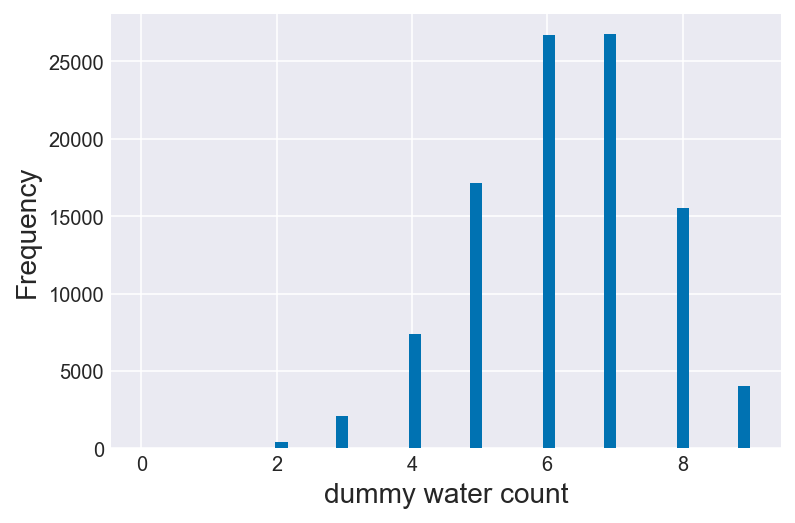

In [48]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
#dummy_w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))
#dummy_w = stats.binom.rvs(n=9, p=samples)
plt.hist(dummy_w, bins=50)
plt.xlabel('dummy water count', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

#### Code 3.27

In [49]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

#### Code 3.28

In [51]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

#### Code 3.29

#### Code 3.30

In [ ]:
sum(birth1) + sum(birth2)

# Practice

## Easy

**3E1** How much posterior probability lies below $p = 0.2$?

In [235]:
sum(samples < 0.2) / 1e4

0.0

**3E2** How much of the posterior probability lies above $p=0.8$?

In [236]:
sum(samples > 0.8) / 1e4

0.0

**3E3** How much of the posterior probability lies between $p=0.2$ and $p=0.8$?

In [237]:
sum((0.2 < samples) & (samples < 0.8)) / 1e4

1.0

**3E4** 20% of the posterior probability lies below which value of $p$?

In [238]:
np.percentile(samples, 20)

0.46846846846846846

**3E5** 20% of the posterior probability lies above which value of $p$?

In [239]:
np.percentile(samples, 80)

0.5515515515515516

**3E6** Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?

In [240]:
interval = pm.hpd(samples, alpha=1 - 0.66)
interval

array([0.46546547, 0.55855856])

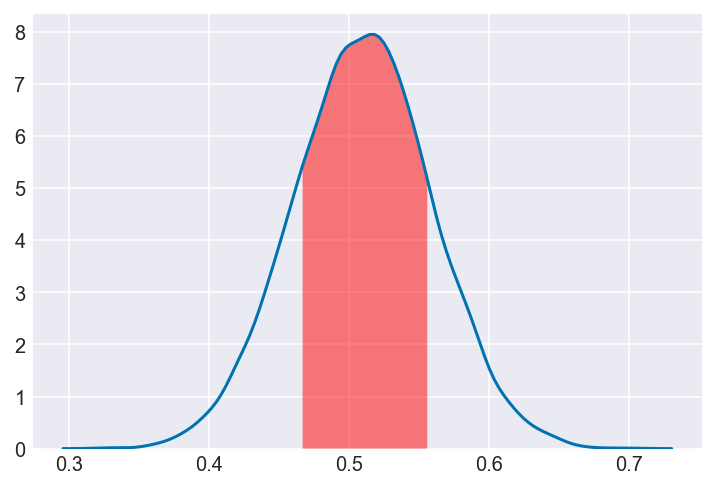

In [241]:
x, y = sns.kdeplot(samples).get_lines()[-1].get_data()
mask = (interval[0] < x) & (x < interval[1])
x, y = x[mask], y[mask]
plt.fill_between(x, y, alpha=0.5, facecolor='r');

**3E7** Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and and above the interval?

In [242]:
np.percentile(samples, [17, 100 - 17])

array([0.46246246, 0.55655656])

## Medium

**3M1** Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

In [243]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=8, tosses=15)

**3M2** Draw 10,000 samples from the grid approximation above. Then use the samples to calculate the 90% HPDI for $p$.

In [244]:
samples = np.random.choice(p_grid, size=10_000, p=posterior)

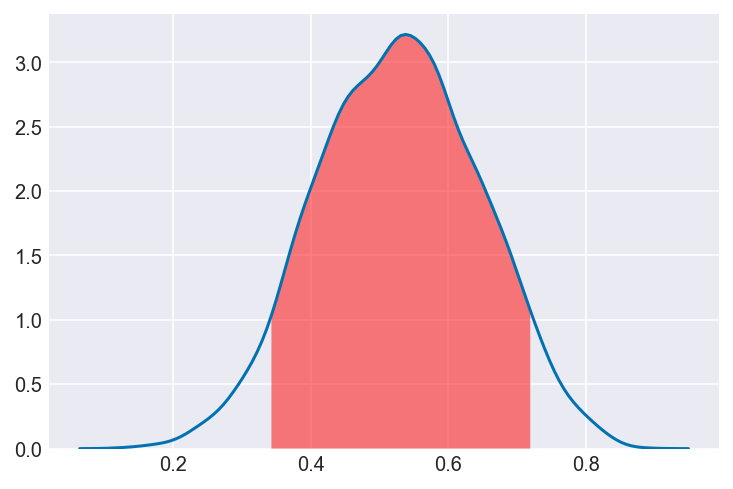

In [245]:
# Calculate interval
interval = pm.hpd(samples, 1 - .90)
# Plot with fill-between for HPD
x, y = sns.kdeplot(samples).get_lines()[0].get_data()
mask = (x > interval[0]) & (x < interval[1])
plt.fill_between(x[mask], y[mask], alpha=0.5, facecolor='r');

**3M3** Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty of $p$. What is the probability of observing 8 water in 15 tosses?

In [246]:
p = np.median(samples)
p

0.5285285285285285

In [247]:
stats.binom.pmf(8, n=15, p=0.53)

0.20297404821792459

**3M4** Using the posterior distriution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [248]:
stats.binom.pmf(6, 9, p)

0.19189168155740638

**3M5** Start over at **3M1** but now use a prior that is zero below $p=0.5$ and a constant above $p=0.5$. This corresponds to prior information that a majority of the Earth's surface is water. Repeat each problem aove and compare the inferenes. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value $p=0.7$.

In [249]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = (p_grid >= 0.5).astype(int)
    
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [250]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=8, tosses=15)
samples = np.random.choice(p_grid, size=10_000, p=posterior)
hpd = pm.hpd(samples, 0.1)

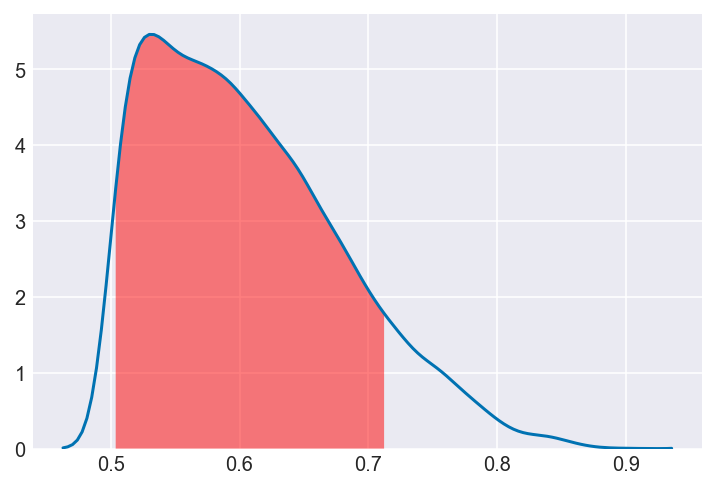

In [251]:
x, y = sns.kdeplot(samples).get_lines()[0].get_data()
mask = (x > hpd[0]) & (x < hpd[1])
plt.fill_between(x[mask], y[mask], alpha=0.5, facecolor='r');

In [252]:
p = np.median(samples)
print(f'median p-value with new prior: {p}')
stats.binom.pmf(8, 15, p)

median p-value with new prior: 0.5945945945945946


0.18094348481734324

In [253]:
stats.binom.pmf(6, 9, p)

0.2473281970115453

A better prior moves our probability average from 0.53 to 0.59 even with the same observed data. This is closer to the true value of 0.7, indicating a more informed prior *can* improve your posterior outcome. 

## Hard

**3H1** Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

In [254]:
def posterior_grid_approx(grid_points=1000, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)
    
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [255]:
births = np.concatenate([birth1, birth2])
p_grid, posterior = posterior_grid_approx(success=sum(births), tosses=len(births))

In [256]:
# Parameter value which maximizes the posterior
p = p_grid[np.argmax(posterior)]
p

0.5545545545545546

**3H2** Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89% and 97% highest posteiror density intervals

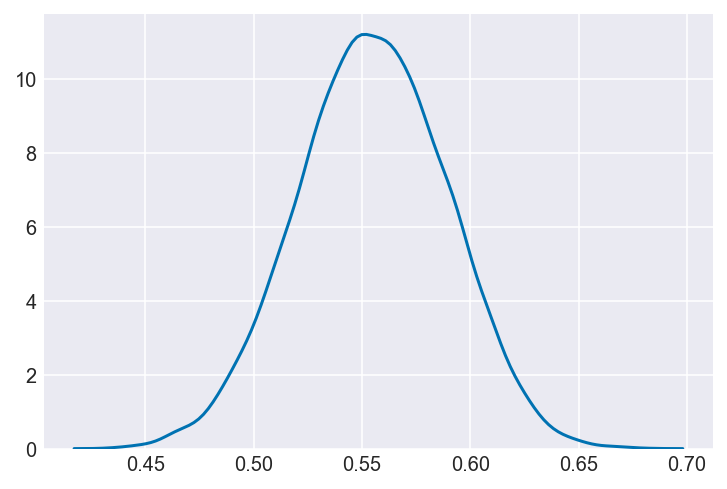

In [257]:
samples = np.random.choice(p_grid, size=10_000, p=posterior)
sns.kdeplot(samples);

In [258]:
hpd_50 = pm.hpd(samples, 0.5)
hpd_89 = pm.hpd(samples, 1 - 0.89)
hpd_97 = pm.hpd(samples, 1 - 0.97)
print(f'HPD\n50%: {hpd_50}\n89%: {hpd_89}\n97%: {hpd_97}')

HPD
50%: [0.53153153 0.57757758]
89%: [0.5005005  0.60960961]
97%: [0.48048048 0.62662663]


**3H3** Use *rvs* to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). 

Average number of births: 111.0


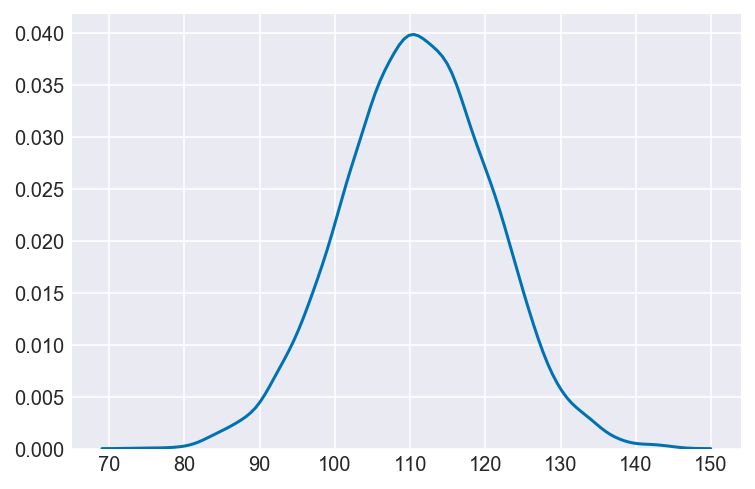

In [259]:
sim_births = stats.binom.rvs(n=200, p=samples, size=10_000)
print(f'Average number of births: {np.median(sim_births)}')
sns.kdeplot(sim_births);

**3H4** Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births. how does the model look now?

In [262]:
p_grid, posterior = posterior_grid_approx(success=sum(birth1), tosses=len(birth1))
samples = np.random.choice(p_grid, size=10_000, p=posterior)

Births in birth1: 51	Births in sim_births: 51.0


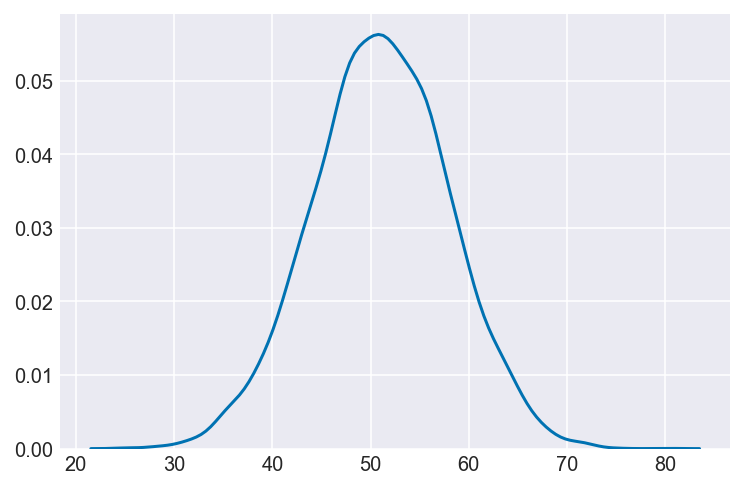

In [265]:
sim_birth1 = stats.binom.rvs(n=100, p=samples, size=10_000)
print(f'Births in birth1: {sum(birth1)}\tBirths in sim_births: {np.median(sim_birth1)}')
sns.kdeplot(sim_birth1);

**3H5** The model assumes the sex of the first and second are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times. Compare the counts of boys in your simulation to the actual observed count of boys following girls. How does the model look? What is going on in the data?

In [266]:
girls_born_first = birth2[birth1 == 0]
len(girls_born_first)

49

In [267]:
posterior_predictive_dist = stats.binom.rvs(len(girls_born_first), size=10_000, p=samples)

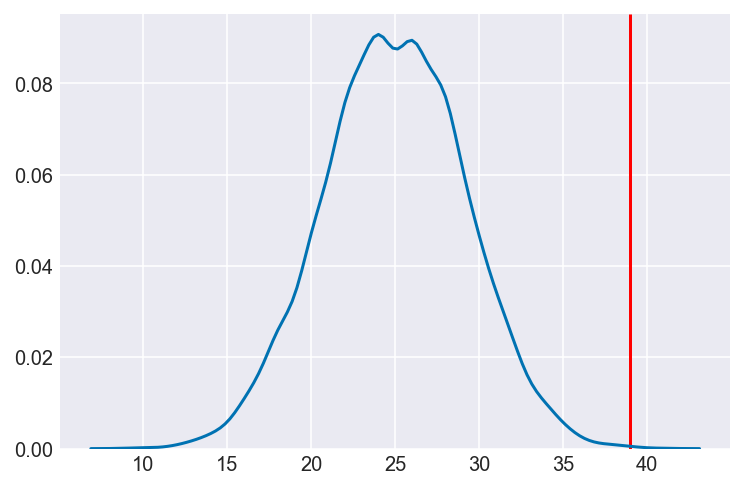

In [281]:
ax = sns.kdeplot(posterior_predictive_dist)
plt.vlines(sum(girls_born_first), *ax.get_ylim(), color='r')